<a href="https://colab.research.google.com/github/epraichu/ai-gp-course/blob/main/lesson19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 37.1 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import math
# Import bibliotek
from sklearn.metrics import classification_report
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [10]:
df = sns.load_dataset("iris")
print(df.head(10))
print(len(df))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
150


In [8]:
feature_pairs = [
 ('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('petal_length', 'petal_width')
]

feature_names_pl = {
 'sepal_length': 'Długość działki kielicha (cm)',
 'sepal_width': 'Szerokość działki kielicha (cm)',
 'petal_length': 'Długość płatka (cm)',
 'petal_width': 'Szerokość płatka (cm)'
}


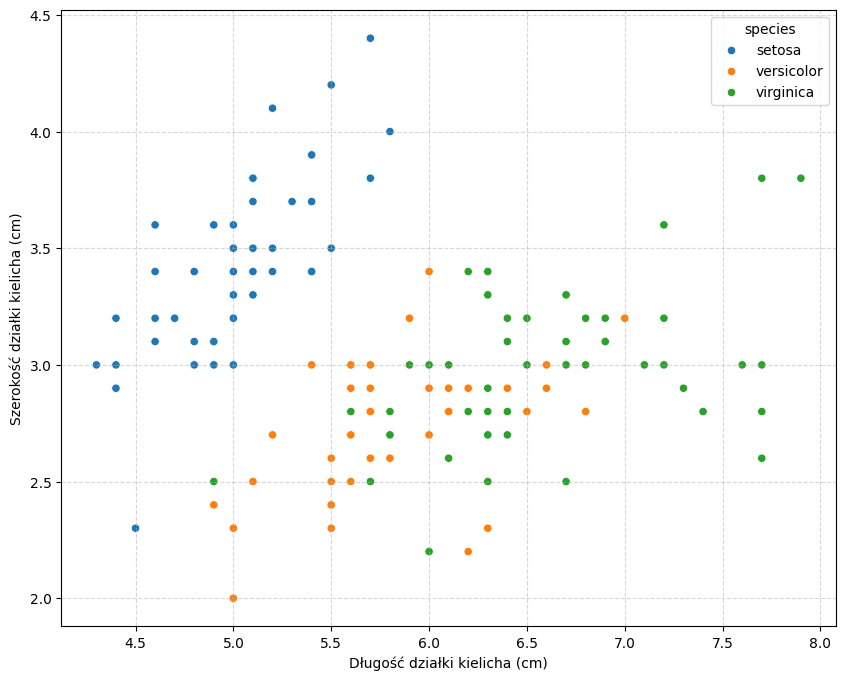

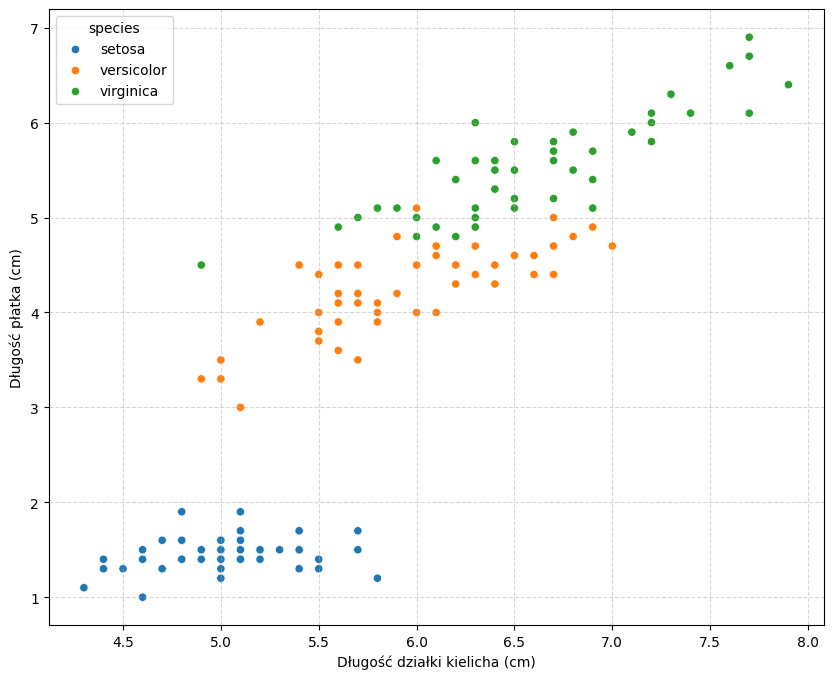

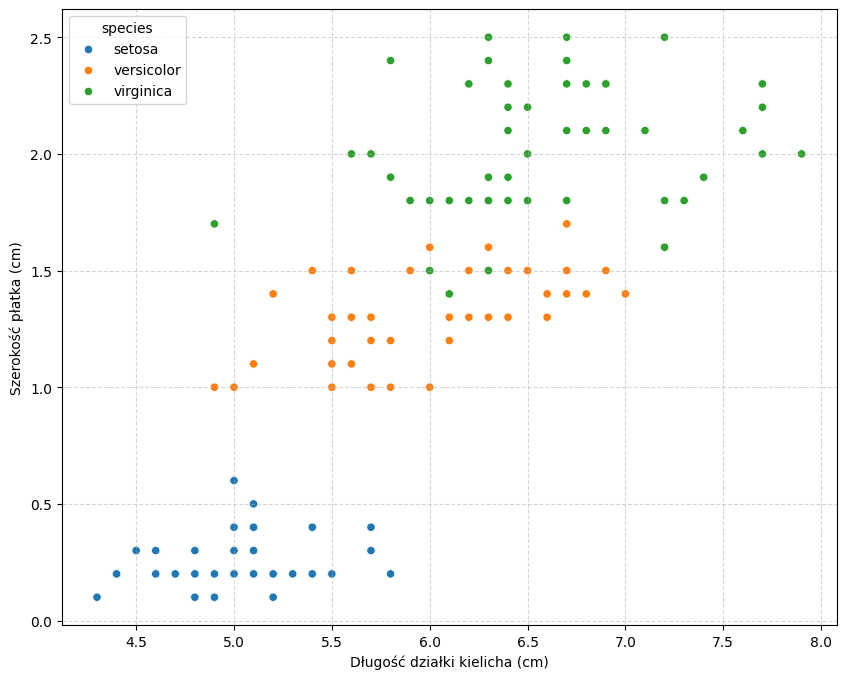

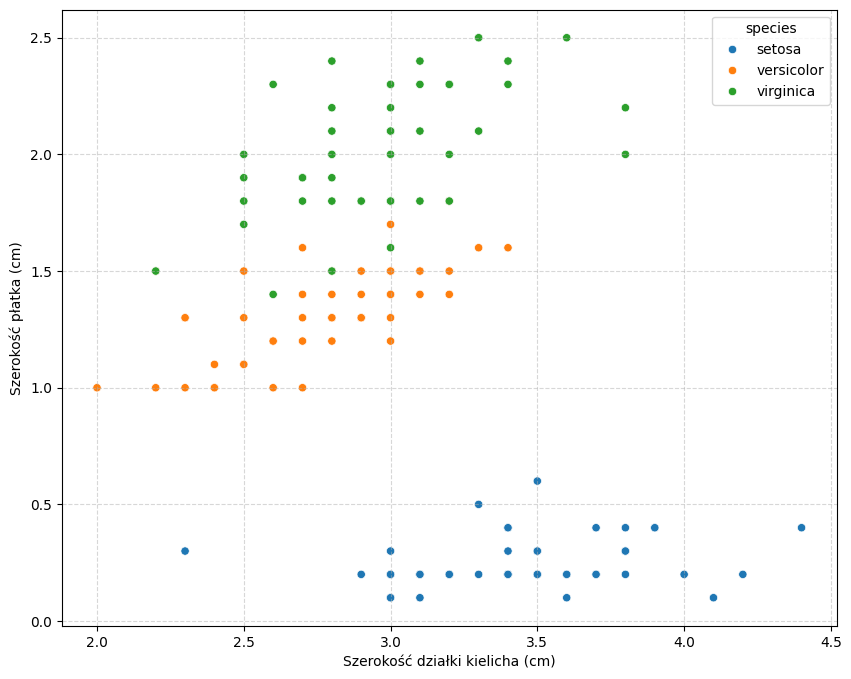

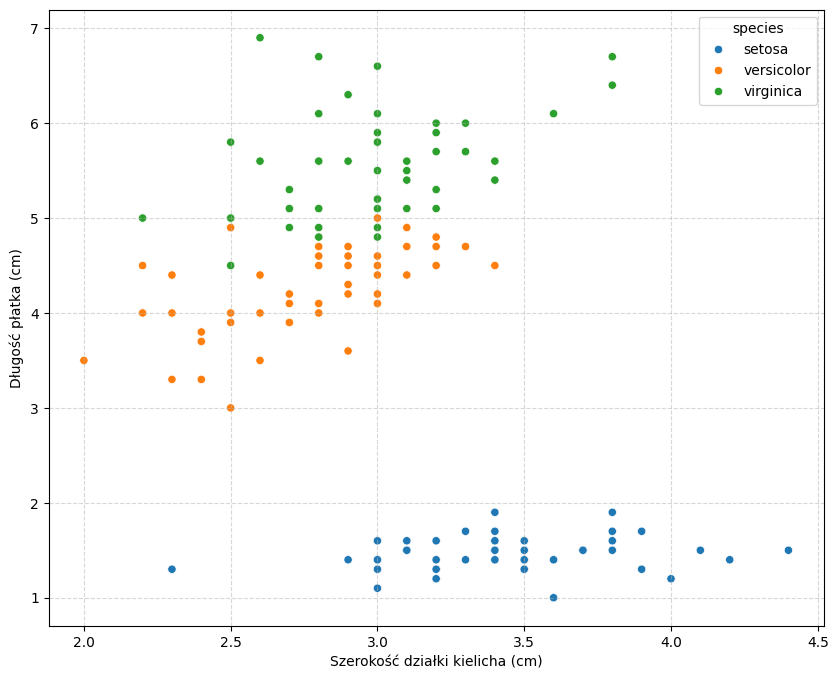

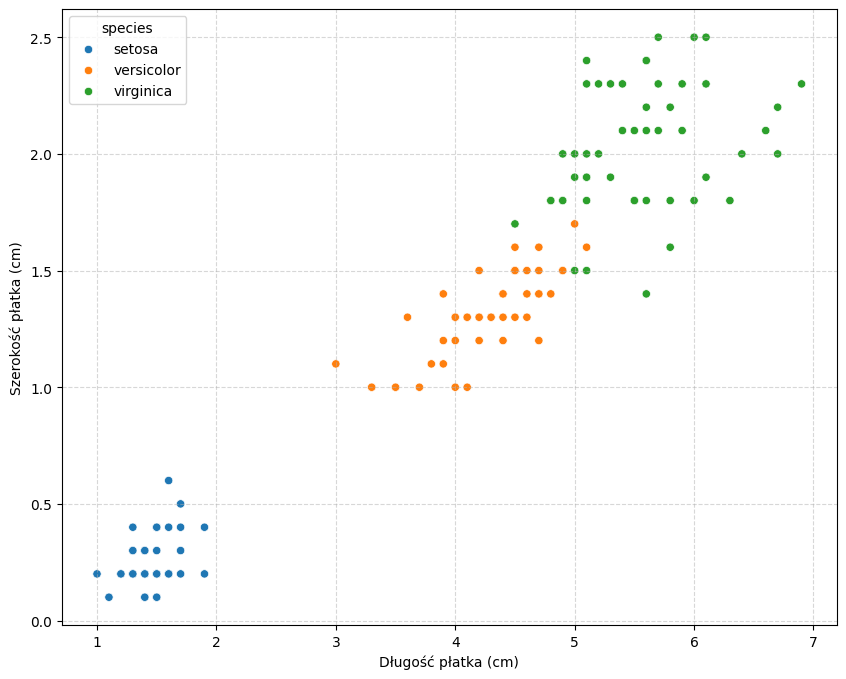

In [21]:
for x_feature, y_feature in feature_pairs:
  plt.figure(figsize=(10,8))

  scatter = sns.scatterplot(
      data=df,
      x=x_feature,
      y=y_feature,
      hue='species'
  )
  x_name_pl = feature_names_pl[x_feature]
  y_name_pl = feature_names_pl[y_feature]
  plt.xlabel(x_name_pl)
  plt.ylabel(y_name_pl)
  plt.grid(True, linestyle='--', alpha = 0.5)


In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_train, df_test = train_test_split(df, test_size=0.30, random_state=42)
features = [
    'petal length (cm)',
    'petal width (cm)'
]
species = iris.target_names
results = []
for feature in features:
  for specie in species:
    data = df_test[df_test['species']== specie][feature]
    results.append({
        "Feature": feature,
        "Species": specie,
        "Minimum": 0.9 * data.min(),
        "Maximum": 1.1 * data.max(),
        "Mean": data.mean()
    })
summary_df = pd.DataFrame(results)
summary_df

,Feature,Species,Minimum,Maximum,Mean
0,petal length (cm),setosa,0.90,1.87,1.457895
1,petal length (cm),versicolor,3.24,5.28,4.400000
2,petal length (cm),virginica,4.41,7.59,5.569231
3,petal width (cm),setosa,0.09,0.44,0.242105
4,petal width (cm),versicolor,0.99,1.76,1.392308
5,petal width (cm),virginica,1.62,2.53,2.084615


In [26]:
#Klasyfikacja na podstawie długości i szerokości płatka.

# Załaduj dane Iris (wszystkie 4 cechy)
iris = load_iris()
X = iris.data[:, :]
y = iris.target

# Użycie całych danych do testowania
X_test = X
y_test = y

# Definicja zmiennych wejściowych
sepal_length = ctrl.Antecedent(np.linspace(4, 8, 1000), 'sepal_length')
sepal_width = ctrl.Antecedent(np.linspace(2, 5, 1000), 'sepal_width')
petal_length = ctrl.Antecedent(np.linspace(1, 7, 1000), 'petal_length')
petal_width = ctrl.Antecedent(np.linspace(0, 2.5, 1000), 'petal_width')

# Definicja zmiennej wyjściowej
species = ctrl.Consequent(np.linspace(0, 2, 1000), 'species')

# Funkcje przynależności
petal_length['setosa'] = fuzz.trimf(petal_length.universe, [0.8, 1.45,  2.44])
petal_length['versicolor'] = fuzz.trimf(petal_length.universe, [2.44 , 4.40, 5.76])
petal_length['virginica'] = fuzz.trimf(petal_length.universe, [ 3.92, 5.57, 8.28])

petal_width['setosa'] = fuzz.trimf(petal_width.universe, [0.08, 0.24, 0.66])
petal_width['versicolor'] = fuzz.trimf(petal_width.universe, [0.66, 1.39, 1.92])
petal_width['virginica'] = fuzz.trimf(petal_width.universe, [1.44, 2.08, 2.76])

# Funkcje przynależności dla wyjścia
species['setosa'] = fuzz.trimf(species.universe, [0, 0, 0.5])
species['versicolor'] = fuzz.trimf(species.universe, [0.5, 1, 1.5])
species['virginica'] = fuzz.trimf(species.universe, [1.5, 2, 2])


# Definicja reguł
rule1 = ctrl.Rule(petal_length['setosa'] & petal_width['setosa'], species['setosa'])
rule2 = ctrl.Rule(petal_length['versicolor'] & petal_width['versicolor'], species['versicolor'])
rule3 = ctrl.Rule(petal_length['virginica'] & petal_width['virginica'], species['virginica'])


# Tworzenie systemu sterowania
species_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Klasyfikacja testowa
y_pred = []
for sl, sw, pl, pw in X_test:
    species_sim = ctrl.ControlSystemSimulation(species_ctrl)
    species_sim.input['petal_length'] = pl
    species_sim.input['petal_width'] = pw

    species_sim.compute()
    fuzzy_result = species_sim.output['species']

    if fuzzy_result < 0.5:
        y_pred.append(0)
    elif fuzzy_result < 1.5:
        y_pred.append(1)
    else:
        y_pred.append(2)

# Ewaluacja modelu
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.82      1.00      0.90        50
   virginica       1.00      0.78      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

